In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma

### Étape n°1 : Récupérer les jeux de données

In [225]:
df_pop = pd.read_csv('df_pop.csv')
df_anim = pd.read_csv('df_anim.csv')
df_veg = pd.read_csv('df_veg.csv')
df_zone = pd.read_csv('df_zone.csv')
df_regions_countries = pd.read_csv('df_regions_countries.csv')

FBS : Bilans Alimentaires: Bilans Alimentaires (2010-)

### Étape n°2 : Nettoyage et préparation des données

In [226]:
# 1.Nettoyer les titres de colonnes en supprimant les espaces au début et à la fin, en remplaçant les espaces par des underscores et en mettant tout en minuscule
df_pop.columns = df_pop.columns.str.strip().str.lower().str.replace(' ', '_')
df_anim.columns = df_anim.columns.str.strip().str.lower().str.replace(' ', '_')
df_veg.columns = df_veg.columns.str.strip().str.lower().str.replace(' ', '_')
df_zone.columns = df_zone.columns.str.strip().str.lower().str.replace(' ', '_')
df_regions_countries.columns  = df_regions_countries.columns.str.strip().str.lower().str.replace(' ', '_')
df_regions_countries.partner_country_group  = df_regions_countries.partner_country_group.str.strip().str.lower().str.replace(' ', '_')
df_regions_countries.partner_countries = df_regions_countries.partner_countries.str.strip().str.lower().str.replace(' ', '_')

In [227]:
#2.Quelle sont les dimensions des jeux de données ?
print("La dimension de df_pop est : ",df_pop.shape)
print("La dimension de df_anim est : ",df_anim.shape)
print("La dimension de df_veg est : ",df_veg.shape)

La dimension de df_pop est :  (366, 14)
La dimension de df_anim est :  (31542, 14)
La dimension de df_veg est :  (93458, 14)


In [228]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

In [229]:
# 3.A quoi ressemblent les 5 premières lignes de mes jeux de données ?
print("les 5 premières lignes de df_pop est : ",df_pop.head(5))
print("les 5 premières lignes de df_anim est : ",df_anim.head(5))
print("les 5 premières lignes de df_veg est : ",df_veg.head(5))

les 5 premières lignes de df_pop est :    domain_code                 domain  area_code_(fao)         area  \
0         FBS  Food Balances (2010-)                2  Afghanistan   
1         FBS  Food Balances (2010-)                2  Afghanistan   
2         FBS  Food Balances (2010-)                3      Albania   
3         FBS  Food Balances (2010-)                3      Albania   
4         FBS  Food Balances (2010-)                4      Algeria   

   element_code                        element item_code_(cpc)        item  \
0           511  Total Population - Both sexes           S2501  Population   
1           511  Total Population - Both sexes           S2501  Population   
2           511  Total Population - Both sexes           S2501  Population   
3           511  Total Population - Both sexes           S2501  Population   
4           511  Total Population - Both sexes           S2501  Population   

   year_code  year          unit     value flag  \
0       2018  2018 

In [230]:
#4.Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’ qui prendra respectivement une valeur ‘animal’ et ‘vegetal’. 
df_anim = df_anim.assign(type='animal')
df_veg = df_veg.assign(type='vegetal')

In [231]:
df_anim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31542 entries, 0 to 31541
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   domain_code       31542 non-null  object 
 1   domain            31542 non-null  object 
 2   area_code_(fao)   31542 non-null  int64  
 3   area              31542 non-null  object 
 4   element_code      31542 non-null  int64  
 5   element           31542 non-null  object 
 6   item_code_(cpc)   31542 non-null  object 
 7   item              31542 non-null  object 
 8   year_code         31542 non-null  int64  
 9   year              31542 non-null  int64  
 10  unit              31542 non-null  object 
 11  value             31542 non-null  float64
 12  flag              31542 non-null  object 
 13  flag_description  31542 non-null  object 
 14  type              31542 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 3.6+ MB


In [232]:
# Regroupez les deux jeux de données en 1 et appelez ce DataFrame product. Attention à bien comprendre la structure des données pour utiliser la bonne méthode.
product = pd.concat([df_veg,df_anim], ignore_index=True)

In [233]:
df_anim.shape

(31542, 15)

In [234]:
df_veg.shape

(93458, 15)

In [235]:
product.shape

(125000, 15)

In [236]:
df_pop.head(1)

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),2,Afghanistan,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,37172.0,X,Figure from international organizations


In [237]:
#5.Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population. 
df_pop = df_pop[["area_code_(fao)","area","year","value"]]
# Renommer la colonne ‘value’ en ‘pop_1000_hab’.
df_pop = df_pop.rename(columns={'value':'pop_1000_hab'})
df_pop

,area_code_(fao),area,year,pop_1000_hab
0,2,Afghanistan,2018,37172.00
1,2,Afghanistan,2019,38041.75
2,3,Albania,2018,2883.00
3,3,Albania,2019,2880.92
4,4,Algeria,2018,42228.00
...,...,...,...,...
361,249,Yemen,2019,29161.92
362,251,Zambia,2018,17352.00
363,251,Zambia,2019,17861.03
364,181,Zimbabwe,2018,14438.80


In [238]:
product.head(1)

,domain_code,domain,area_code_(fao),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),2,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value,vegetal


In [239]:
#6.Transformez products afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit, value.
product = product[["area_code_(fao)","area","element","item","year","type","unit","value"]]
product

,area_code_(fao),area,element,item,year,type,unit,value
0,2,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2018,vegetal,kg,160.12
1,2,Afghanistan,Food supply quantity (kg/capita/yr),Wheat and products,2019,vegetal,kg,158.95
2,2,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2018,vegetal,kcal/capita/day,1372.02
3,2,Afghanistan,Food supply (kcal/capita/day),Wheat and products,2019,vegetal,kcal/capita/day,1361.66
4,2,Afghanistan,Protein supply quantity (g/capita/day),Wheat and products,2018,vegetal,g/capita/day,37.00
...,...,...,...,...,...,...,...,...
124995,181,Zimbabwe,Food supply (kcal/capita/day),Aquatic Plants,2019,animal,kcal/capita/day,0.00
124996,181,Zimbabwe,Protein supply quantity (g/capita/day),Aquatic Plants,2018,animal,g/capita/day,0.00
124997,181,Zimbabwe,Protein supply quantity (g/capita/day),Aquatic Plants,2019,animal,g/capita/day,0.00
124998,181,Zimbabwe,Fat supply quantity (g/capita/day),Aquatic Plants,2018,animal,g/capita/day,0.00


In [240]:
# 7.Fusionnez df_pop avec products et nommez ce DataFrame df. Afin de fusionner ces jeux de données vous devez identifier les clés primaires. 
df = pd.merge(df_pop, product, on=['area_code_(fao)','area','year'])
# display(df)

# # Renommer les colonnes comme sur la capture d’écran ci-dessous.
df = df.drop('unit',axis=1)
df

,area_code_(fao),area,year,pop_1000_hab,element,item,type,value
0,2,Afghanistan,2018,37172.00,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,160.12
1,2,Afghanistan,2018,37172.00,Food supply (kcal/capita/day),Wheat and products,vegetal,1372.02
2,2,Afghanistan,2018,37172.00,Protein supply quantity (g/capita/day),Wheat and products,vegetal,37.00
3,2,Afghanistan,2018,37172.00,Fat supply quantity (g/capita/day),Wheat and products,vegetal,4.59
4,2,Afghanistan,2018,37172.00,Food supply quantity (kg/capita/yr),Rice and products,vegetal,19.78
...,...,...,...,...,...,...,...,...
124995,181,Zimbabwe,2019,14645.47,Fat supply quantity (g/capita/day),"Aquatic Animals, Others",animal,0.00
124996,181,Zimbabwe,2019,14645.47,Food supply quantity (kg/capita/yr),Aquatic Plants,animal,0.00
124997,181,Zimbabwe,2019,14645.47,Food supply (kcal/capita/day),Aquatic Plants,animal,0.00
124998,181,Zimbabwe,2019,14645.47,Protein supply quantity (g/capita/day),Aquatic Plants,animal,0.00


In [241]:
# 8.Quelles sont les types de données de chaque colonne ?
df.dtypes

area_code_(fao)      int64
area                object
year                 int64
pop_1000_hab       float64
element             object
item                object
type                object
value              float64
dtype: object

In [242]:
# 9.Combien y-a t’il de valeurs manquantes par variable ?
df.isnull().sum()

area_code_(fao)    0
area               0
year               0
pop_1000_hab       0
element            0
item               0
type               0
value              0
dtype: int64

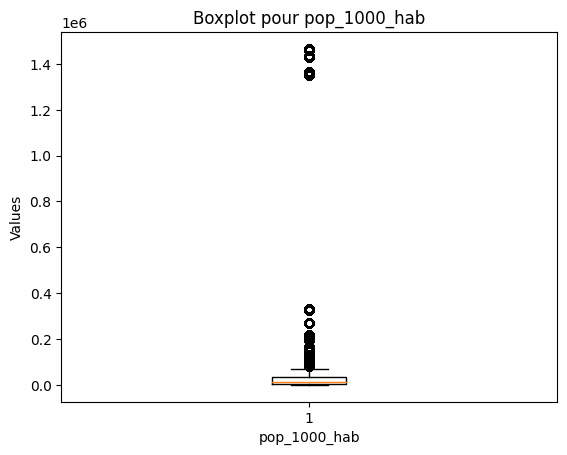

In [243]:
# 10.Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.
# Create a figure and axis object
fig, ax = plt.subplots()

# Draw the boxplot
plt.boxplot(df['pop_1000_hab'])

# Set the title and axis labels
ax.set_title('Boxplot pour pop_1000_hab')
ax.set_xlabel('pop_1000_hab')
ax.set_ylabel('Values')

# Display the plot
plt.show()


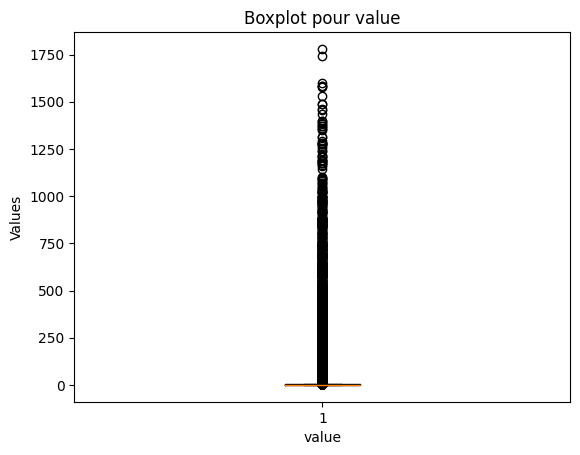

In [244]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Draw the boxplot
plt.boxplot(df['value'])

# Set the title and axis labels
ax.set_title('Boxplot pour value')
ax.set_xlabel('value')
ax.set_ylabel('Values')

# Display the plot
plt.show()

In [245]:
df.describe()

,area_code_(fao),year,pop_1000_hab,value
count,125000.000000,125000.000000,1.250000e+05,125000.000000
mean,128.742184,2018.508584,5.143125e+04,11.001024
std,75.250822,0.499928,1.872539e+05,56.218072
min,1.000000,2018.000000,1.076000e+01,-0.030000
25%,66.000000,2018.000000,2.801000e+03,0.000000
50%,124.000000,2019.000000,9.965000e+03,0.190000
75%,191.000000,2019.000000,3.182529e+04,2.800000
max,351.000000,2019.000000,1.465634e+06,1779.760000


####    
    - Si il y a une valeur negative -0.03 pour la colonne 'value'
    - Il existe aussi des valeurs aberrantes pour les colonnes 'pop_1000_hab' et 'value' en regardant leurs boxplots.

In [246]:
# df[['pop_1000_hab','value']] = df[['pop_1000_hab','value']].apply(lambda x: np.nan if 'L' in x else x)
#df = df.apply(lambda x: np.nan if 'L' in x else x)

In [247]:
df

,area_code_(fao),area,year,pop_1000_hab,element,item,type,value
0,2,Afghanistan,2018,37172.00,Food supply quantity (kg/capita/yr),Wheat and products,vegetal,160.12
1,2,Afghanistan,2018,37172.00,Food supply (kcal/capita/day),Wheat and products,vegetal,1372.02
2,2,Afghanistan,2018,37172.00,Protein supply quantity (g/capita/day),Wheat and products,vegetal,37.00
3,2,Afghanistan,2018,37172.00,Fat supply quantity (g/capita/day),Wheat and products,vegetal,4.59
4,2,Afghanistan,2018,37172.00,Food supply quantity (kg/capita/yr),Rice and products,vegetal,19.78
...,...,...,...,...,...,...,...,...
124995,181,Zimbabwe,2019,14645.47,Fat supply quantity (g/capita/day),"Aquatic Animals, Others",animal,0.00
124996,181,Zimbabwe,2019,14645.47,Food supply quantity (kg/capita/yr),Aquatic Plants,animal,0.00
124997,181,Zimbabwe,2019,14645.47,Food supply (kcal/capita/day),Aquatic Plants,animal,0.00
124998,181,Zimbabwe,2019,14645.47,Protein supply quantity (g/capita/day),Aquatic Plants,animal,0.00


In [248]:
# 11.Affichez les valeurs uniques de la colonne area
df['area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Fre

In [249]:
#12.Gardez uniquement les informations relatives aux pays (supprimez les zones géographiques ou économiques) Note : en fonction de votre méthode d’importation de données cette étape est facultative.
df = pd.pivot_table(df, values='value', index=['area_code_(fao)','area','year','item','pop_1000_hab','type'], columns='element')
df

element                                                                    Fat supply quantity (g/capita/day)  \
area_code_(fao) area    year item                    pop_1000_hab type                                          
1               Armenia 2018 Apples and products     2951.74      vegetal                                0.12   
                             Aquatic Animals, Others 2951.74      animal                                 0.00   
                             Aquatic Plants          2951.74      animal                                 0.00   
                             Bananas                 2951.74      vegetal                                0.06   
                             Barley and products     2951.74      vegetal                                0.29   
...                                                                                                       ...   
351             China   2019 Tomatoes and products   1465634.16   vegetal                                0.29   
                             Vegetables, other       1465634.16   vegetal                                1.93   
                             Wheat and products      1465634.16   vegetal                                3.15   
                             Wine                    1465634.16   vegetal                                0.00   
                             Yams                    1465634.16   vegetal                                0.00   

element                                                                    Food supply (kcal/capita/day)  \
area_code_(fao) area    year item                    pop_1000_hab type                                     
1               Armenia 2018 Apples and products     2951.74      vegetal                          21.17   
                             Aquatic Animals, Others 2951.74      animal                            0.01   
                             Aquatic Plants          2951.74      animal                            0.00   
                             Bananas                 2951.74      vegetal                          12.51   
                             Barley and products     2951.74      vegetal                          54.14   
...                                                                                                  ...   
351             China   2019 Tomatoes and products   1465634.16   vegetal                          18.70   
                             Vegetables, other       1465634.16   vegetal                         213.68   
                             Wheat and products      1465634.16   vegetal                         580.98   
                             Wine                    1465634.16   vegetal                           3.48   
                             Yams                    1465634.16   vegetal                           0.01   

element                                                                    Food supply quantity (kg/capita/yr)  \
area_code_(fao) area    year item                    pop_1000_hab type                                           
1               Armenia 2018 Apples and products     2951.74      vegetal                                13.95   
                             Aquatic Animals, Others 2951.74      animal                                  0.00   
                             Aquatic Plants          2951.74      animal                                  0.00   
                             Bananas                 2951.74      vegetal                                 7.61   
                             Barley and products     2951.74      vegetal                                 6.00   
...                                                                                                        ...   
351             China   2019 Tomatoes and products   1465634.16   vegetal                                35.75   
                             Vegetables, other       1465634.16   vegetal                          

In [250]:
# reset the index
df = df.reset_index()
df


element,area_code_(fao),area,year,item,pop_1000_hab,type,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,Apples and products,2951.74,vegetal,0.12,21.17,13.95,0.07
1,1,Armenia,2018,"Aquatic Animals, Others",2951.74,animal,0.00,0.01,0.00,0.00
2,1,Armenia,2018,Aquatic Plants,2951.74,animal,0.00,0.00,0.00,0.00
3,1,Armenia,2018,Bananas,2951.74,vegetal,0.06,12.51,7.61,0.15
4,1,Armenia,2018,Barley and products,2951.74,vegetal,0.29,54.14,6.00,1.80
...,...,...,...,...,...,...,...,...,...,...
31423,351,China,2019,Tomatoes and products,1465634.16,vegetal,0.29,18.70,35.75,1.07
31424,351,China,2019,"Vegetables, other",1465634.16,vegetal,1.93,213.68,321.88,12.39
31425,351,China,2019,Wheat and products,1465634.16,vegetal,3.15,580.98,66.52,18.65
31426,351,China,2019,Wine,1465634.16,vegetal,0.00,3.48,1.86,0.00


In [251]:
#14.Faire du nettoyage dans le nom des colonnes
df.rename(columns={'area_code_(fao)': 'area_country', 'area': 'country'}, inplace=True)
df.drop(columns=('type'))

element,area_country,country,year,item,pop_1000_hab,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,Apples and products,2951.74,0.12,21.17,13.95,0.07
1,1,Armenia,2018,"Aquatic Animals, Others",2951.74,0.00,0.01,0.00,0.00
2,1,Armenia,2018,Aquatic Plants,2951.74,0.00,0.00,0.00,0.00
3,1,Armenia,2018,Bananas,2951.74,0.06,12.51,7.61,0.15
4,1,Armenia,2018,Barley and products,2951.74,0.29,54.14,6.00,1.80
...,...,...,...,...,...,...,...,...,...
31423,351,China,2019,Tomatoes and products,1465634.16,0.29,18.70,35.75,1.07
31424,351,China,2019,"Vegetables, other",1465634.16,1.93,213.68,321.88,12.39
31425,351,China,2019,Wheat and products,1465634.16,3.15,580.98,66.52,18.65
31426,351,China,2019,Wine,1465634.16,0.00,3.48,1.86,0.00


In [252]:
# y-a t’il de valeurs manquantes par variable ?
df.isnull().sum()

element
area_country                                0
country                                     0
year                                        0
item                                        0
pop_1000_hab                                0
type                                        0
Fat supply quantity (g/capita/day)        222
Food supply (kcal/capita/day)             263
Food supply quantity (kg/capita/yr)         7
Protein supply quantity (g/capita/day)    220
dtype: int64

In [253]:
#15.Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018
mask = df['year'] == 2018
df_2018 = df[mask]
df_2018

element,area_country,country,year,item,pop_1000_hab,type,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,Apples and products,2951.74,vegetal,0.12,21.17,13.95,0.07
1,1,Armenia,2018,"Aquatic Animals, Others",2951.74,animal,0.00,0.01,0.00,0.00
2,1,Armenia,2018,Aquatic Plants,2951.74,animal,0.00,0.00,0.00,0.00
3,1,Armenia,2018,Bananas,2951.74,vegetal,0.06,12.51,7.61,0.15
4,1,Armenia,2018,Barley and products,2951.74,vegetal,0.29,54.14,6.00,1.80
...,...,...,...,...,...,...,...,...,...,...
31330,351,China,2018,Tomatoes and products,1459378.00,vegetal,0.28,18.18,34.76,1.04
31331,351,China,2018,"Vegetables, other",1459378.00,vegetal,1.91,220.58,325.49,12.58
31332,351,China,2018,Wheat and products,1459378.00,vegetal,3.10,573.06,65.68,18.38
31333,351,China,2018,Wine,1459378.00,vegetal,0.00,3.50,1.87,0.00


In [254]:
# 16.Nous allons ajouter une nouvelle colonne à notre jeu de données : la zone géographique.

In [255]:
# list_name=['eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 'northern_america', 'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 'southern_asia', 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe', 'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia']
# def fn (arg=list_name[0]):
    
# df_position = pd.read_csv(arg + ".csv")
# df_position["area_code_(fao)"]
# df_position["zone"]=arg

In [256]:
# # Load the dataframe that contains the information for the new column
# list_name = ['eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 'northern_america', 'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 'southern_asia', 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe', 'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia']
# df_position = pd.read_csv(list_name[0] + ".csv")

# # Merge the two dataframes based on a common key
# merged_df = pd.merge(df, df_position[["area_code_(fao)", "zone"]], on="area_code_(fao)", how="left")

# # Add the new column to the original dataset using the merged dataframe
# df["zone"] = merged_df["zone"]

# # Repeat the above steps for other values in the list_name to add new zone columns to the original dataset


In [257]:
df_regions_countries["partner_country_group"].unique()

array(['africa', 'americas', 'asia', 'australia_and_new_zealand',
       'caribbean', 'central_america', 'central_asia', 'eastern_africa',
       'eastern_asia', 'eastern_europe', 'europe', 'european_union_(27)',
       'land_locked_developing_countries', 'least_developed_countries',
       'low_income_food_deficit_countries', 'melanesia', 'micronesia',
       'middle_africa', 'net_food_importing_developing_countries',
       'northern_africa', 'northern_america', 'northern_europe',
       'oceania', 'polynesia', 'small_island_developing_states',
       'south_america', 'south-eastern_asia', 'southern_africa',
       'southern_asia', 'southern_europe', 'western_africa',
       'western_asia', 'western_europe', 'world'], dtype=object)

In [258]:
my_list = ['africa', 'americas', 'asia','europe','european_union_(27)','land_locked_developing_countries', 'least_developed_countries','low_income_food_deficit_countries','net_food_importing_developing_countries','oceania','small_island_developing_states','world']
mask1 = df_regions_countries.partner_country_group.isin(my_list)
not_mask1 = ~mask1
df_regions = df_regions_countries[not_mask1]
df_regions

,partner_country_group_code,partner_country_group,partner_country_code,partner_countries,m49_code,iso2_code,iso3_code
159,5501,australia_and_new_zealand,10,australia,36.0,AU,AUS
160,5501,australia_and_new_zealand,92,heard_and_mcdonald_islands,334.0,HM,HMD
161,5501,australia_and_new_zealand,156,new_zealand,554.0,NZ,NZL
162,5501,australia_and_new_zealand,161,norfolk_island,574.0,NF,NFK
163,5206,caribbean,8,antigua_and_barbuda,28.0,AG,ATG
...,...,...,...,...,...,...,...
748,5404,western_europe,125,liechtenstein,438.0,LI,LIE
749,5404,western_europe,256,luxembourg,442.0,LU,LUX
750,5404,western_europe,140,monaco,492.0,MC,MCO
751,5404,western_europe,150,netherlands,528.0,NL,NLD


In [259]:
df_regions.rename(columns={'partner_countries': 'country', 'partner_country_group': 'zone_géographique'}, inplace=True)
df_regions

/tmp/ipykernel_6009/1745894631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regions.rename(columns={'partner_countries': 'country', 'partner_country_group': 'zone_géographique'}, inplace=True)


,partner_country_group_code,zone_géographique,partner_country_code,country,m49_code,iso2_code,iso3_code
159,5501,australia_and_new_zealand,10,australia,36.0,AU,AUS
160,5501,australia_and_new_zealand,92,heard_and_mcdonald_islands,334.0,HM,HMD
161,5501,australia_and_new_zealand,156,new_zealand,554.0,NZ,NZL
162,5501,australia_and_new_zealand,161,norfolk_island,574.0,NF,NFK
163,5206,caribbean,8,antigua_and_barbuda,28.0,AG,ATG
...,...,...,...,...,...,...,...
748,5404,western_europe,125,liechtenstein,438.0,LI,LIE
749,5404,western_europe,256,luxembourg,442.0,LU,LUX
750,5404,western_europe,140,monaco,492.0,MC,MCO
751,5404,western_europe,150,netherlands,528.0,NL,NLD


In [260]:
df_2018

element,area_country,country,year,item,pop_1000_hab,type,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,Armenia,2018,Apples and products,2951.74,vegetal,0.12,21.17,13.95,0.07
1,1,Armenia,2018,"Aquatic Animals, Others",2951.74,animal,0.00,0.01,0.00,0.00
2,1,Armenia,2018,Aquatic Plants,2951.74,animal,0.00,0.00,0.00,0.00
3,1,Armenia,2018,Bananas,2951.74,vegetal,0.06,12.51,7.61,0.15
4,1,Armenia,2018,Barley and products,2951.74,vegetal,0.29,54.14,6.00,1.80
...,...,...,...,...,...,...,...,...,...,...
31330,351,China,2018,Tomatoes and products,1459378.00,vegetal,0.28,18.18,34.76,1.04
31331,351,China,2018,"Vegetables, other",1459378.00,vegetal,1.91,220.58,325.49,12.58
31332,351,China,2018,Wheat and products,1459378.00,vegetal,3.10,573.06,65.68,18.38
31333,351,China,2018,Wine,1459378.00,vegetal,0.00,3.50,1.87,0.00


In [261]:
df_2018.country = df_2018.country.str.strip().str.lower().str.replace(' ', '_')
df_2018

/tmp/ipykernel_6009/536999221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018.country = df_2018.country.str.strip().str.lower().str.replace(' ', '_')


element,area_country,country,year,item,pop_1000_hab,type,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,1,armenia,2018,Apples and products,2951.74,vegetal,0.12,21.17,13.95,0.07
1,1,armenia,2018,"Aquatic Animals, Others",2951.74,animal,0.00,0.01,0.00,0.00
2,1,armenia,2018,Aquatic Plants,2951.74,animal,0.00,0.00,0.00,0.00
3,1,armenia,2018,Bananas,2951.74,vegetal,0.06,12.51,7.61,0.15
4,1,armenia,2018,Barley and products,2951.74,vegetal,0.29,54.14,6.00,1.80
...,...,...,...,...,...,...,...,...,...,...
31330,351,china,2018,Tomatoes and products,1459378.00,vegetal,0.28,18.18,34.76,1.04
31331,351,china,2018,"Vegetables, other",1459378.00,vegetal,1.91,220.58,325.49,12.58
31332,351,china,2018,Wheat and products,1459378.00,vegetal,3.10,573.06,65.68,18.38
31333,351,china,2018,Wine,1459378.00,vegetal,0.00,3.50,1.87,0.00


In [262]:
df_2018 = df_2018.merge(df_regions[['country', 'zone_géographique']], on='country', how='left')
df_2018

,area_country,country,year,item,pop_1000_hab,type,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day),zone_géographique
0,1,armenia,2018,Apples and products,2951.74,vegetal,0.12,21.17,13.95,0.07,western_asia
1,1,armenia,2018,"Aquatic Animals, Others",2951.74,animal,0.00,0.01,0.00,0.00,western_asia
2,1,armenia,2018,Aquatic Plants,2951.74,animal,0.00,0.00,0.00,0.00,western_asia
3,1,armenia,2018,Bananas,2951.74,vegetal,0.06,12.51,7.61,0.15,western_asia
4,1,armenia,2018,Barley and products,2951.74,vegetal,0.29,54.14,6.00,1.80,western_asia
...,...,...,...,...,...,...,...,...,...,...,...
15434,351,china,2018,Tomatoes and products,1459378.00,vegetal,0.28,18.18,34.76,1.04,eastern_asia
15435,351,china,2018,"Vegetables, other",1459378.00,vegetal,1.91,220.58,325.49,12.58,eastern_asia
15436,351,china,2018,Wheat and products,1459378.00,vegetal,3.10,573.06,65.68,18.38,eastern_asia
15437,351,china,2018,Wine,1459378.00,vegetal,0.00,3.50,1.87,0.00,eastern_asia


In [263]:
# y-a t’il de valeurs manquantes par variable ?
df_2018.isnull().sum()

area_country                                0
country                                     0
year                                        0
item                                        0
pop_1000_hab                                0
type                                        0
Fat supply quantity (g/capita/day)        103
Food supply (kcal/capita/day)             124
Food supply quantity (kg/capita/yr)         0
Protein supply quantity (g/capita/day)    102
zone_géographique                           0
dtype: int64

### Étape n°3: Exploration

In [264]:
#1.Quelle est la médiane de la variable fat_supply_quantity_(g/capita/day) ? Q1 ? Q3 ? La moyenne ? L’écart type ? (il existe une méthode pour visualiser toutes ces informations en même temps). Interprétez ces mesures statistiques dans une phrase.
df_2018['Fat supply quantity (g/capita/day)'].median()

0.03

In [265]:
df_2018.describe()

,area_country,year,pop_1000_hab,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
count,15439.000000,15439.0,1.543900e+04,15336.000000,15315.000000,15439.000000,15337.000000
mean,128.433318,2018.0,5.183325e+04,1.058911,33.961766,7.989390,0.963582
std,74.937612,0.0,1.877052e+05,3.434564,106.801685,23.292076,3.269798
min,1.000000,2018.0,5.200000e+01,0.000000,0.000000,0.000000,-0.030000
25%,66.000000,2018.0,2.935000e+03,0.000000,0.190000,0.030000,0.000000
50%,123.000000,2018.0,9.965000e+03,0.030000,3.100000,0.590000,0.030000
75%,191.000000,2018.0,3.152800e+04,0.350000,19.745000,4.580000,0.390000
max,351.000000,2018.0,1.459378e+06,61.240000,1779.760000,424.360000,47.710000


La médiane de la variable fat_supply_quantity_(g/capita/day) = 0.03

Q1 = 0.000000	

Q3 = 0.350000

La moyenne =  1.058911

L’écart type = 3.434564

#----------------------------------------------------

Interprétez ces mesures statistiques dans une phrase.

#----------------------------------------------------

La médiane de la variable 'fat_supply_quantity_(g/capita/day)' est de 0,03, ce qui signifie que la moitié des valeurs de cette variable sont inférieures à 0,03 et l'autre moitié est supérieure à 0,03.

Le premier quartile (Q1) est de 0,000000, ce qui signifie que 25% des valeurs sont inférieures à 0,000000.

Le troisième quartile (Q3) est de 0,350000, ce qui signifie que 75% des valeurs sont inférieures à 0,350000.

La moyenne de la variable est de 1,058911, ce qui peut être affecté par des valeurs extrêmes (outliers) dans la distribution des données.

L'écart-type de la variable est de 3,434564, ce qui indique que les données sont assez dispersées autour de la moyenne. En résumé, la plupart des valeurs de la variable 'fat_supply_quantity_(g/capita/day)' sont assez faibles et se situent dans la fourchette de 0 à 0,35. Cependant, il existe certaines valeurs extrêmes qui éloignent la moyenne de la médiane.

In [266]:
# y-a t’il de valeurs manquantes par variable ?
df_2018.isnull().sum()

area_country                                0
country                                     0
year                                        0
item                                        0
pop_1000_hab                                0
type                                        0
Fat supply quantity (g/capita/day)        103
Food supply (kcal/capita/day)             124
Food supply quantity (kg/capita/yr)         0
Protein supply quantity (g/capita/day)    102
zone_géographique                           0
dtype: int64

In [267]:
#2.Visualisez la distribution des données numériques à l’aide d’un histogramme. Utilisez une boucle si nécessaire. Si certaines variables contiennent des valeurs extrêmes vous pouvez effectuer une transformation sur vos données. (En logarithmes par exemple)


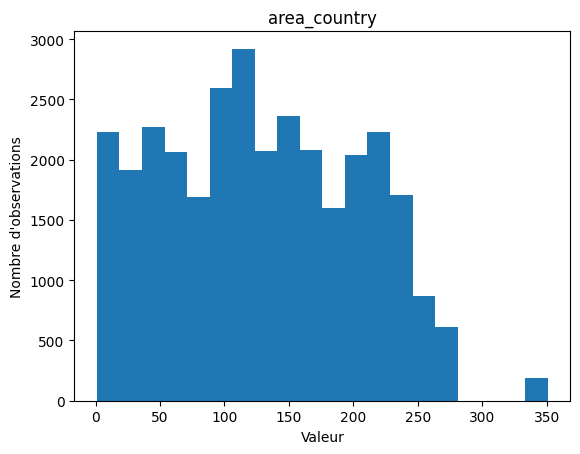

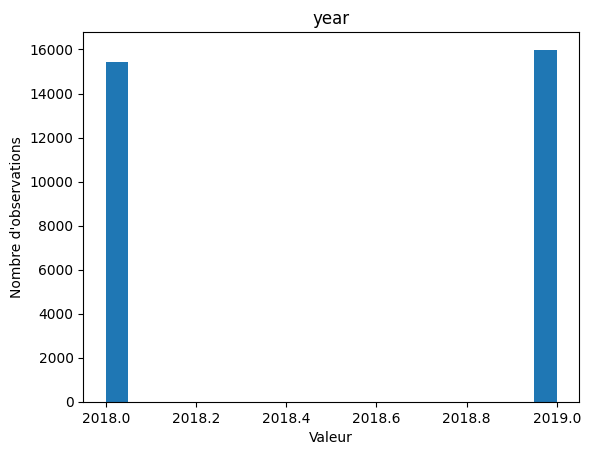

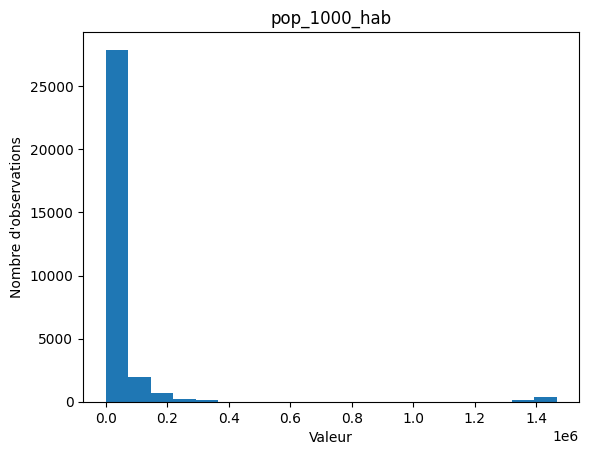

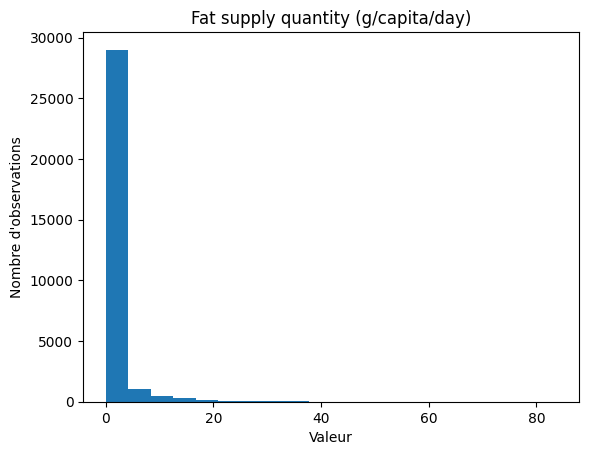

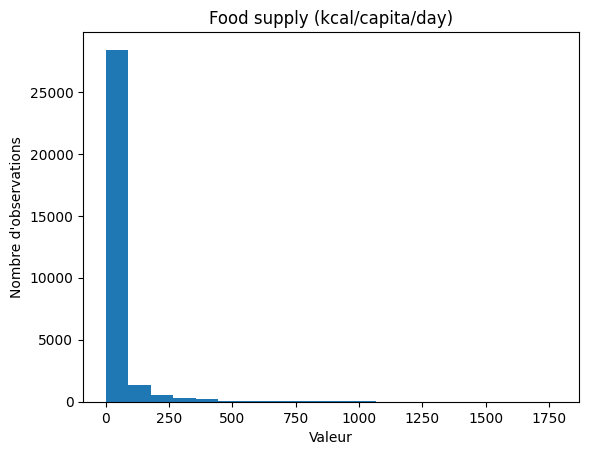

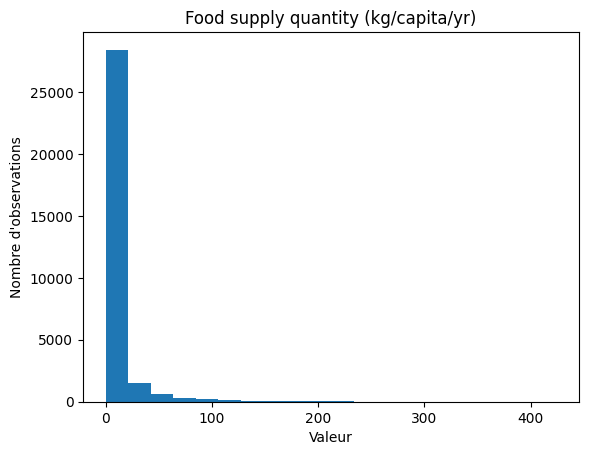

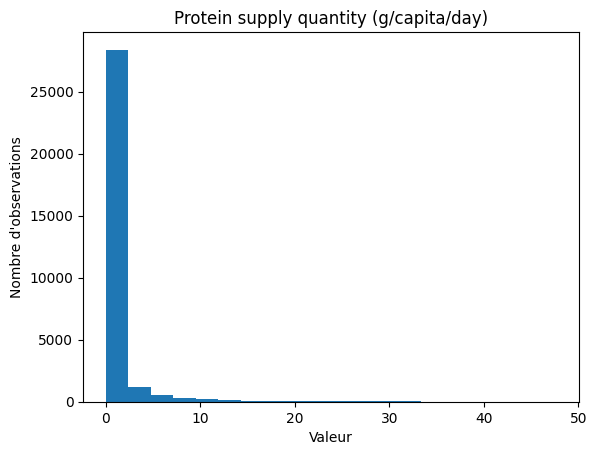

In [268]:
# Créer un sous-ensemble contenant uniquement les variables numériques
num_cols = df_2018.select_dtypes(include=['float64', 'int64']).columns

# Parcourir chaque variable numérique et tracer son histogramme
for col in num_cols:
    # Appliquer une transformation logarithme
    transformed_data = np.log(df[col] + 1)
    
    # Tracer l'histogramme
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.xlabel('Valeur')
    plt.ylabel('Nombre d\'observations')
    plt.show()

In [269]:
# 3.Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)
ukraine_pop_2018 = df_2018.loc[(df_2018['country'] == 'ukraine') & (df_2018['year'] == 2018), 'pop_1000_hab'].iloc[0]
ukraine_pop_2018

44246.0

In [270]:
# 4.Quels sont les 10 pays les plus peuplés ?
# top_10_populated = df_2018.nlargest(10, 'pop_1000_hab')
# top_10_populated
# Regrouper les données par pays et calculer la somme de la population pour chaque pays
pop_by_country = df_2018.groupby('country')['pop_1000_hab'].sum()

# Trier les données par ordre décroissant de population et sélectionner les 10 premiers pays
top_10_populated_countries = pop_by_country.sort_values(ascending=False).head(10)
top_10_populated_countries

country
china                       1.357222e+08
china,_mainland             1.270607e+08
india                       1.176799e+08
united_states_of_america    2.845735e+07
indonesia                   2.409039e+07
pakistan                    1.888829e+07
brazil                      1.843327e+07
nigeria                     1.802050e+07
bangladesh                  1.468531e+07
russian_federation          1.224166e+07
Name: pop_1000_hab, dtype: float64

In [280]:
# Quelle est la population mondiale en 2018 ? En 2019 ? Est-ce que ce chiffre correspond à la réalité ?
# Sélectionner les données de l'année 2018
pop_2018 = df_2018.loc[df['year'] == 2018].drop_duplicates(subset='country')['pop_1000_hab']

# Calculer la somme de la population de tous les pays en 2018
world_pop_2018 = pop_2018.sum()
world_pop_2018

8822557.87

In [286]:
pop_2019 = df_2018.loc[df['year'] == 2019].drop_duplicates(subset='country')['pop_1000_hab']

# Calculer la somme de la population de tous les pays en 2018
world_pop_2019 = pop_2019.sum()
world_pop_2019

9015391.540000001

In [290]:
# 6.Pour quels pays dispose-t-on du moins d’informations (nombre de valeurs manquantes) ? Donnez-en 5.
# Calculer le nombre de valeurs manquantes pour chaque pays
missing_values_by_country = df_2018.isnull().groupby('country').sum()

# Trier les données par ordre croissant et sélectionner les 5 premiers pays
top_5_countries_with_missing_values = missing_values_by_country.sum(axis=1).sort_values().head(5)

# Afficher les résultats
print("Les 5 pays avec le moins d'informations (nombre de valeurs manquantes) sont :\n", top_5_countries_with_missing_values)


Les 5 pays avec le moins d'informations (nombre de valeurs manquantes) sont :
 country
False    329
dtype: int64


country
False    329
dtype: int64

In [289]:
df_2018['country']

0        armenia
1        armenia
2        armenia
3        armenia
4        armenia
          ...   
15434      china
15435      china
15436      china
15437      china
15438      china
Name: country, Length: 15439, dtype: object